<center><img src="images/header.png"></center>

<h1><center>Алгоритмы интеллектуальной обработки больших объемов данных</center></h1>
<hr>
<h2><center>SVM, Kernel Trick (практика)</center></h2>

**Срок сдачи:** 24 апреля 2017, 06:00 <br> 
**Штраф за опоздание:** -2 балла после 06:00 24 апреля, -4 балла после 06:00 1 мая, -6 баллов после 06:00 8 мая

При отправлении ДЗ указывайте фамилию в названии файла<br>

Не забудте создать задание в Slack через /todo.

Используйте данный Ipython Notebook при оформлении домашнего задания.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from Levenshtein import distance
from sklearn.model_selection import cross_val_score

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 6)

# Семинарская часть

Функция `select_model` принимает на вход обучающую выборку и возвращает модель (машину опорных векторов) с наилучшими параметрами для данной выборки. Эту функцию нужно реализовать.

Подбираемые параметры подели включают в себя:
- различные функции ядра (линейное, RBF, полиномиальные разных степеней)
- различные значения константы $C$ ($0, 0.1, 1, 10, 100, 1000, 10000$)

Подбирать параметры необходимо с помощью 10-fold кросс-валидации. Сейчас в качестве заглушки функция всегда возвращает линейный SVC.

In [37]:
def select_model(x, y):
    """
    Implement some model selection strategy here:
    seek through different kernels and parameters.

    Use a validation scheme to select the best model
    
    Quality metric: accuracy

    Returns:
        SVM classifier implemented by sklearn SVC class.
    """
    best_accuracy = 0
    best_model = None
    c_range = np.array([0.1,1,10,100,1000,10000])
    
    kernel_list = ['rbf', 'linear', 'poly']
    
    for kernel in kernel_list:
        for c in c_range:
            if kernel == 'poly':
                for degree in [2,3]:
                    model = SVC(C=c,kernel=kernel, degree=degree)
                    print "Trying model {}".format(model)
                    accuracy = np.mean(cross_val_score(model, x, y, scoring='accuracy', cv=10))
                    if accuracy > best_accuracy:
                        best_model = model
                        best_accuracy = accuracy
            else:
                model = SVC(C=c,kernel=kernel)
                print "Trying model {}".format(model)
                accuracy = np.mean(cross_val_score(model, x, y, scoring='accuracy', cv=10))
                if accuracy > best_accuracy:
                        best_model = model
                        best_accuracy = accuracy

    
    best_model.fit(x, y)
    print "Best model %s, with accuracy %f" % (best_model, best_accuracy)
    return best_model

Далее две вспомогательные функции, которые отображают данные и разделяющую поверхность

In [38]:
def plot_data_set(x, y, description=''):
    print "Plotting data set points"
    plt.figure(figsize=(8, 8))

    colors = np.array(['r', 'b'])[y]
    plt.title(description, fontsize='small')
    plt.scatter(x[:, 0], x[:, 1], marker='o', c=colors, s=50)
    
def plot_decision_region(x1_min, x2_min, x1_max, x2_max, clf, n_points=1000):
    print "Plotting decision region"
    x1, x2 = np.meshgrid(np.linspace(x1_min, x1_max, n_points), np.linspace(x2_min, x2_max, n_points))
    z = clf.decision_function(np.c_[x1.ravel(), x2.ravel()]).reshape(x1.shape)

    plt.contour(x1, x2, z, levels=[0.0], linestyles='solid', linewidths=2.0)
    plt.contour(x1, x2, z, levels=[-1.0, 1.0], linestyles='dashed', linewidths=1.0)

Generating 'Linearly-separated' data set
Trying model SVC(C=0.10000000000000001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Trying model SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Trying model SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Trying model SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose

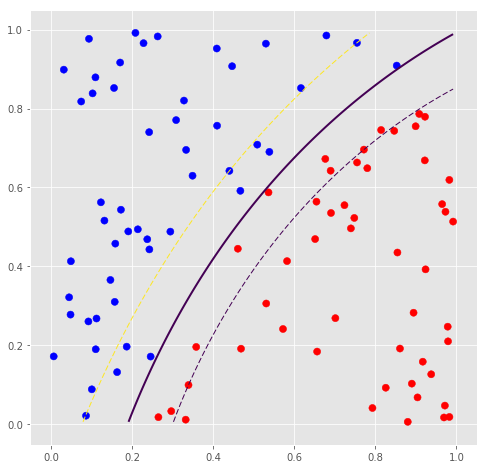

In [39]:
def generate_linear(size=100, k=1.1, b=0.0, nl=0.1):
    print "Generating 'Linearly-separated' data set"

    x = np.random.random((size, 2))
    y = np.zeros(size, dtype=int)
    noise = np.random.randn(size) * nl
    y[x[:, 1] - (k * x[:, 0] + b) > noise] = 1

    return x, y

x, y = generate_linear()
clf = select_model(x, y)
plot_data_set(x, y)
plot_decision_region(x[:, 0].min(), x[:, 1].min(), x[:, 0].max(), x[:, 1].max(), clf)

Generating 'Concentric circles' data set
Trying model SVC(C=0.10000000000000001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Trying model SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Trying model SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Trying model SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose

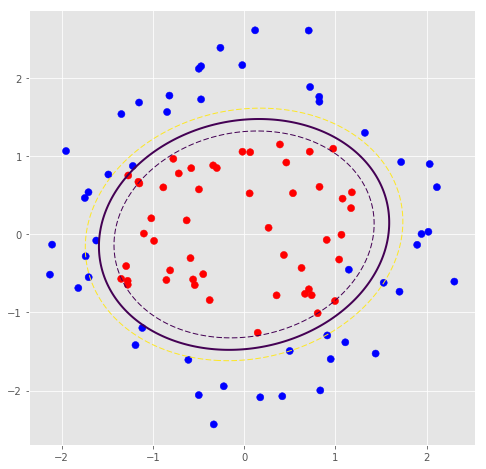

In [23]:
def generate_concentric(size=100, r1=1.0, r2=2.0, sigma=0.3):
    print "Generating 'Concentric circles' data set"
    x = np.zeros((size, 2))
    x[:size/2, 0] = sigma * np.random.randn(size/2) + r1
    x[size/2:, 0] = sigma * np.random.randn(size/2) + r2
    x[:, 1] = (np.random.random(size) - 0.5) * 2 * np.pi
    y = np.hstack([np.zeros(size/2, dtype=int), np.ones(size/2, dtype=int)])

    z = np.zeros((size, 2))
    z[:, 0] = x[:, 0] * np.cos(x[:, 1])
    z[:, 1] = x[:, 0] * np.sin(x[:, 1])

    return z, y

x, y = generate_concentric()
clf = select_model(x, y)
plot_data_set(x, y)
plot_decision_region(x[:, 0].min(), x[:, 1].min(), x[:, 0].max(), x[:, 1].max(), clf)

In [ ]:
def generate_sin(size=200):
    print "Generating 'Sinus-separated' data set"

    x = np.random.random((size, 2))
    x[:, 0] = x[:, 0] * 4 * np.pi
    x[:, 1] = (x[:, 1] - 0.5) * 2
    y = np.zeros(size, dtype=int)
    y[x[:, 1] > np.sin(x[:, 0])] = 1

    return x, y

x, y = generate_sin()
clf = select_model(x, y)
plot_data_set(x, y)
plot_decision_region(x[:, 0].min(), x[:, 1].min(), x[:, 0].max(), x[:, 1].max(), clf)

Generating 'Sinus-separated' data set
Trying model SVC(C=0.10000000000000001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Trying model SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Trying model SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Trying model SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=Fa

# Регрессия с SVM (3 балла)

Загрузите набор данных из *titanium.csv*<br/>
Мы будем решать задачу восстановления столбца 'y' по столбцу 'x'.

## Визуализация данных (1 балл)

Выполните стандартную предобработку данных (z-score) и выведите их на графике.

In [57]:
df_tit = pd.read_csv('./titanium.csv', sep=',')

In [23]:
df_tit.head()

,x,y
0,585.0,0.644
1,595.0,0.622
2,605.0,0.638
3,615.0,0.649
4,625.0,0.652


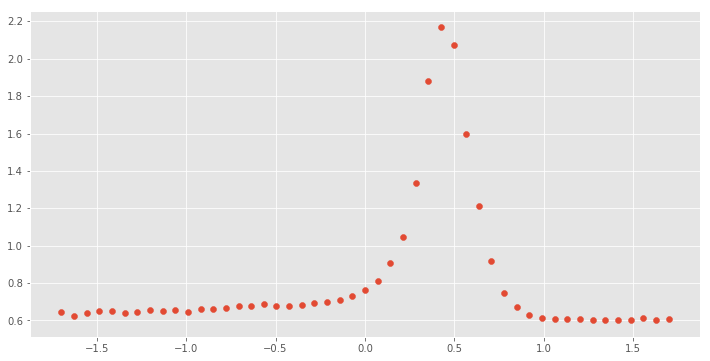

In [58]:
X, y = df_tit.x.values.reshape(-1,1), df_tit.y.values
X = (X - X.mean())/X.std(ddof=0)
plt.scatter(X, y)

## Обучение моделей (2 балла)

Рассмотрите 3 ядра: 
* Линейное
* Полиномиальное (degree = 3, gamma = 6, coef0 = 1)
* RBF (gamma = 6, coef0 = 1)

Во всех случаях установить ширину трубки `epsilon=0.01`

Для каждого из ядер:
1. Пусть `C = np.logspace(-2, 2, 10)`. Постройте графики зависимости ошибки от параметра $C$ (ось графика со значениями параметра $C$ должна быть в логарифмической шкале). Ошибка измеряется как средняя абсолютная ошибка. 
2. Для наулучшего параметра $С$ каждого из ядер постройте график с данными и предстазанием по svm

В каких случаях возникает эффекты недообучения, переобучения?

In [21]:
from sklearn.metrics import mean_absolute_error

In [59]:
epsilon = 0.01
C = np.logspace(-2, 2, 10)
lin_err = []
poly_err = []
rbf_err = []

for c in C:
    svm_lin = SVR(kernel='linear', epsilon=epsilon, C=c)
    svm_poly = SVR(kernel='poly', degree=3, gamma=6, coef0=1, epsilon=epsilon, C=c)
    svm_rbf = SVR(kernel='rbf', gamma=6,  coef0=1, epsilon=epsilon, C=c)
    y_hat = svm_lin.fit(X,y).predict(X)
    lin_err.append(mean_absolute_error(y, y_hat))
    y_hat = svm_poly.fit(X,y).predict(X)
    poly_err.append(mean_absolute_error(y, y_hat))
    y_hat = svm_rbf.fit(X,y).predict(X)
    rbf_err.append(mean_absolute_error(y, y_hat))

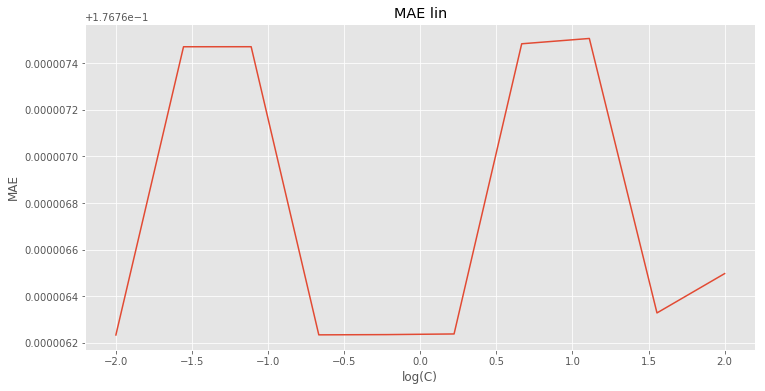

In [60]:
plt.title("MAE lin")
plt.plot(np.log10(C),lin_err)
plt.ylabel('MAE')
plt.xlabel('log(C)')

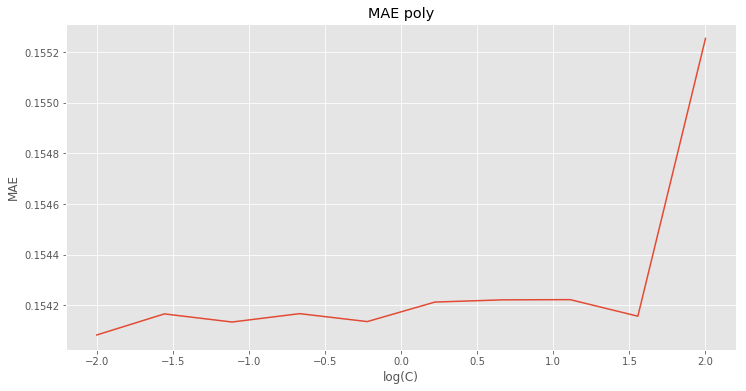

In [61]:
plt.title("MAE poly")
plt.plot(np.log10(C),poly_err)
plt.ylabel('MAE')
plt.xlabel('log(C)')

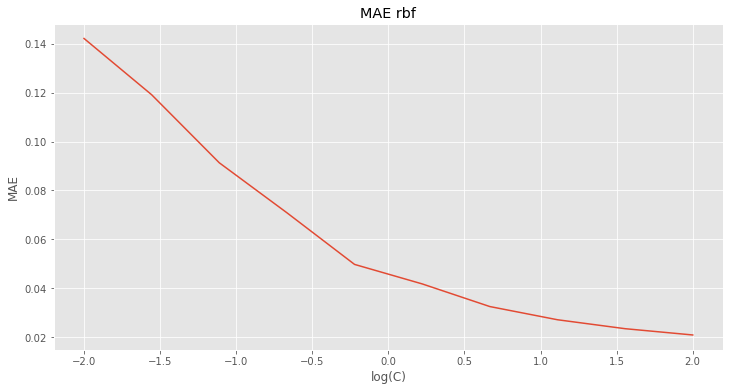

In [62]:
plt.title("MAE rbf")
plt.plot(np.log10(C),rbf_err)
plt.ylabel('MAE')
plt.xlabel('log(C)')

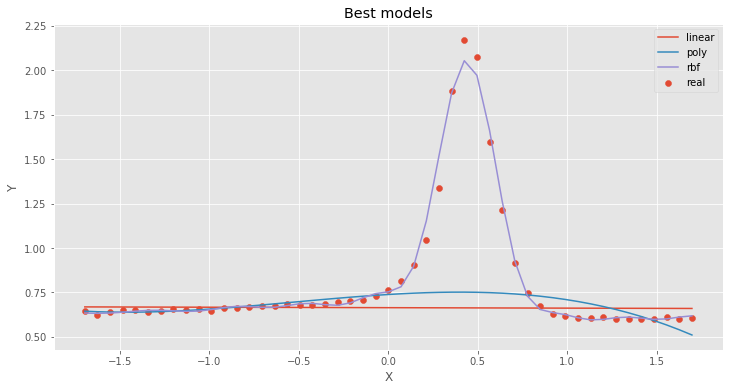

In [69]:
svm_lin = SVR(kernel='linear', epsilon=epsilon, C=C[np.argmin(lin_err)])
svm_poly = SVR(kernel='poly', degree=3, gamma=6, coef0=1, epsilon=epsilon, C=C[np.argmin(poly_err)])
svm_rbf = SVR(kernel='rbf', gamma=6,  coef0=1, epsilon=epsilon, C=C[np.argmin(rbf_err)])

plt.title('Best models')
plt.scatter(X, y, label='real')
plt.plot(X, svm_lin.fit(X,y).predict(X), label='linear')
plt.plot(X,svm_poly.fit(X,y).predict(X), label='poly')
plt.plot(X,svm_rbf.fit(X,y).predict(X), label='rbf')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc="best")
plt.show()

Визуально видим что rbf хорошо описывает данные, а осатльные недообучены, хотя если предположить, что этот пик на графике - шум, то rbf возможно переобучилась, в отличии от отсальных. 

# Определение языка слова (7 баллов)

В данном задании вам необходимо определить, на каком языке написано слово.

Вам будет дано два текста - первые предложения произведения "Война и Мир" на английком и испанском, разбитые на слова. У слов нет общепринятого числового представления, поэтому мы предлагаем вам реализовать собственноге ядро для SVM, основанное на редакторском расстоянии или [расстоянии Левинштейна](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D1%81%D1%82%D0%BE%D1%8F%D0%BD%D0%B8%D0%B5_%D0%9B%D0%B5%D0%B2%D0%B5%D0%BD%D1%88%D1%82%D0%B5%D0%B9%D0%BD%D0%B0). 

Имплементировать расстояние Леванштейна не нужно - можно взять любую доступную реализацию, например [здесь](https://github.com/toastdriven/pylev) или [здесь](https://github.com/ztane/python-Levenshtein).

## Загрузка (1 балл)

Загрузите данные из файлов *war_and_peace_es.txt* и *war_and_peace_en.txt*.<br/> 
В результате вы должны получить pandas.DataFrame со столбцами *index* | *word* | *label*, где *index* - это индекс pandas, *word* - это слово и *label* - это метка класса (0 или 1)

In [2]:
df_wp_en = pd.read_csv('./war_and_peace_en.txt', header=None, names=['word'])
df_wp_en.index.name = 'index' 
df_wp_en['label'] = np.ones(5044)

df_wp_es = pd.read_csv('./war_and_peace_es.txt', header=None, names=['word'])
df_wp_es.index.name = 'index' 
df_wp_es['label'] = np.zeros(6359)

df_wp = pd.concat([df_wp_en,df_wp_es], ignore_index=True)

In [3]:
df_wp

,word,label
0,war,1.0
1,and,1.0
2,peace,1.0
3,leo,1.0
4,tolstoy,1.0
5,book,1.0
6,one,1.0
7,chapter,1.0
8,well,1.0
9,prince,1.0


## Подготовка данных (2 балла)

Особенностью пользовательского ядра в sklean.SVC является то, что на вход оно должно принимать именно вектора чисел.<br/>
В нашем случае это будут индексы соответствующих слов из корпуса. То есть вместо вектора ['treat', 'celebrit', 'prince', ...] на вход в ядро подается вектор из индексов [9209, 11145, 7735, ...] с помощью которых вы будете находить сами слова.

Прежде чем мы начнем строить ядро, надо подготовить данные. Для этого:
1. Задайте переменную RND_SEED, которая будет использоваться в любых генераторах случайных чисел в вашем коде (обычно параметр "random_seed")
2. Случайным образом перемешайте и заново проиндексируйте таблицу, полученную выше (используйте методы df.sample() и df.reset_index())
3. Ядро может вычисляться достаточно долго, поэтому можете урезать таблицу, но оставить в ней не менее 1000 слов.
4. Разбейте данные на обучающую и контрольную выборку в пропорции 60/40

В результате вы должны получить вектор-столбец X_train, X_test с **индексами** слов и векторы y_train, y_test с метками классов.

In [4]:
from sklearn.cross_validation import train_test_split

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
RND_SEED = 123

df_wp_rnd = df_wp.sample(n=11403,random_state=RND_SEED).reset_index(drop=True)
df_fit = df_wp_rnd.sample(n=1000,random_state=RND_SEED)

In [6]:
X, y, words = df_wp_rnd.index.values.reshape(-1,1), df_wp_rnd.label.values, df_wp_rnd.word.values
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=RND_SEED)
x_fit, y_fit = df_fit.index.values.reshape(-1,1), df_fit.label.values

## Расчет ядра (3 балла)

Некоторые указания по составлению пользовательского ядра можно найти [здесь](http://stackoverflow.com/questions/26962159/how-to-use-a-custom-svm-kernel).

Если в двух словах:<br/>
Функция, реазлизующая расчет ядра должна принимать две матрицы $U$ и $V$ с признаковым описанием объектов (во време обучения они обе относятся к обучающей выборке, а во время применения - одна матрица относится к обучающей выборке, а другая к контрольной).

В результате, функция должна возвращать матрицу ядра $G_{ij} = K(U_i, V_j)$.

Таким образом, в этом задании вам надо:
1. Написать функцию *string_kernel(U, V)*, расчитывающее матрицу ядра $G_{ij}$
2. Визуализировать матрицу только для обучающей выборки (функция plt.imshow()).

**ВАЖНО**<br/>
На лекции мы рассмотрели, что ядро должно обладать определенными свойствами, поэтому не получится рассчитать $G_{ij}$ как расстояние Левинштейна между словами $\text{word}_i$ и $\text{word}_j$.<br/>
Вместо этого используйте какое-нибудь готовое ядро, зависящее от расстояние между объектами.

In [135]:
def wf_levenshtein(string_1, string_2): 
    if string_1 == string_2: 
        return 0 
    
    len_1 = len(string_1) 
    len_2 = len(string_2) 
 
    if len_1 == 0: 
        return len_2 
    if len_2 == 0: 
        return len_1 
 
    if len_1 > len_2: 
        string_2, string_1 = string_1, string_2 
        len_2, len_1 = len_1, len_2 
 
    d0 = [i for i in range(len_2 + 1)] 
    d1 = [j for j in range(len_2 + 1)] 
 
    for i in range(len_1): 
        d1[0] = i + 1 
        for j in range(len_2): 
            cost = d0[j] 
 
            if string_1[i] != string_2[j]: 
                # substitution 
                cost += 1 
                
                # insertion 
                x_cost = d1[j] + 1 
                if x_cost < cost: 
                    cost = x_cost 
 
                # deletion 
                y_cost = d0[j + 1] + 1 
                if y_cost < cost: 
                    cost = y_cost 
 
            d1[j + 1] = cost 
 
        d0, d1 = d1, d0 
 
    return d0[-1] 


In [11]:
def string_kernel(U, V, gamma=1):
    gram_matrix = np.zeros((U.shape[0], V.shape[0]))
    for i, x1 in enumerate(U):
        for j, x2 in enumerate(V):
            gram_matrix[i, j] = distance(words[x1[0]], words[x2[0]])
    return np.exp(-gamma * (gram_matrix**2))

G = string_kernel(x_train, x_train)
S = string_kernel(x_test, x_train)
F = string_kernel(x_fit, x_fit)

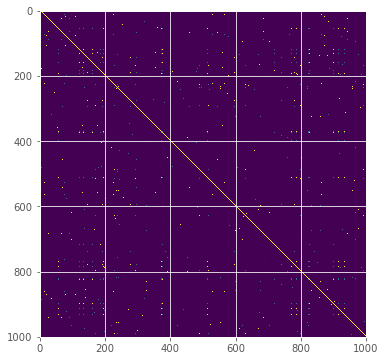

In [10]:
plt.imshow(G)

## Оценка качества (1 балл)

Обучите метод опорных векторов с различными значениями параметра штрафа $C$.<br/>
Для каждого значения выведите accuracy на обучащюей и контрольной выборке.

Постарайтесь достичь качества в 70% на тестовой выборке

In [13]:
for C in np.logspace(-2, 2, 5):
    model = SVC(C=C, kernel='precomputed', random_state=RND_SEED)
    model.fit(G,y_train)

    print "C=%0.2f" % C
    print "train score=%0.10f" % accuracy_score(y_train, model.predict(G))
    print "test score=%0.10f" % accuracy_score(y_test, model.predict(S))

C=0.01
train score=0.6073673440
test score=0.5995177554
C=0.10
train score=0.7637772256
test score=0.7560280579
C=1.00
train score=0.9864054963
test score=0.8974134152
C=10.00
train score=0.9877210934
test score=0.8982902236
C=100.00
train score=0.9877210934
test score=0.8982902236
